
## <center> Data Management and Analysis Project </center>
### <center> GEO4300-Fall2018 </center>

This assignment uses the data from the Narayani River catchment located in centre Nepal. The aim of this project is to  extend your skills in data management and data analysis for statistics in hydrology.Your task for this assignment is to use python notebook to implement your analysis, process your data, and interpret the results. Then, write a report that describes the results and conclusions of your analysis. It might include graphs, tables of numbers, or just a few key computations. Remember that plots and other visual representations of data are very useful in conveying your conclusions.

Your report should contain at least the following parts. You are permitted to write additional sections as well.

**1. Study site description and visualization:**

    -In this section you should read the provided shapefile (.shp) of study basin and plot it. Locate the 
    provided station on map. Write short description about the station based on the stastion elevation.


**2. Data Description and Visualization:**

In this section, you should describe the data  and do some basic data analysis. For instance:

  1. Read the provided data and arrange it in timeseries format. 
  2. calculate the yearly averages of temperature, precipitation and discharge for each station.
  3. Make a plot for yearly averages value (with station name as a title) for each station and comments on your results.[It means you will have 5 plots, and you should slect the nearest discharge station to the hydro-metero station to show plot in same plot]
       
**3. Statistical Analysis:**

In this section, you should do some of statistical calculation and interpret your results. Our ultimate goal for this Data Management and Analysis Project is to find the tempeature lapse rate and precipitation gradient for Narayani basin. Remember that the lapse rate is the temperature variation with height; the lapse rate is positive if the temperature increases with height, and it is negative if the temperature decreases with height. Mathmatically it can be calculated by: 
    
    lapse rate = (change in temperature) / (change in altitude)
    
Simillary calculate the precipitation lapse rate for this catchment and write equation for both cases. 


**4. Summary and conclustion:**

    Write conclusiton based on your results from data analysis. 

**5. Data Management (Optional):**

Finally you should create a netcdf (.nc file) file containing all variables (temperature, precipitation and discharge) with time, latitude and longitude as a dimension. 

**Project report submission:**

Before submission:first make sure that from the menu you can select: "Cell --> Run All" without failures. Second, write comments for each code that you have written.Third, simply upload the  .ipynb files to Fronter named: lastname.ipynb

In [72]:
%matplotlib inline
#Hint - how to read shapefile
#Import and use 'shapefile' to read .shp file. This can be done by:
import shapefile
shpFilePath = 'Narayani_catchment/watershed.shp'  
listx=[]
listy=[]
shp_file = shapefile.Reader(shpFilePath)
for sr in shp_file.shapeRecords():
    for xNew,yNew in sr.shape.points:
        listx.append(xNew) # longitude
        listy.append(yNew) # latitude
        
# use pandas to read datafile
#use matplotlib.pyplot for data visualization

In [73]:
import matplotlib.pyplot as plt

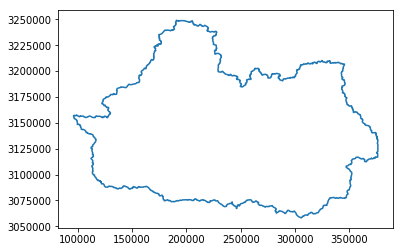

In [74]:
plt.plot(listx,listy)

In [75]:
import pandas as pd
import numpy as np

In [76]:
loc = pd.read_table('station_loc.txt')

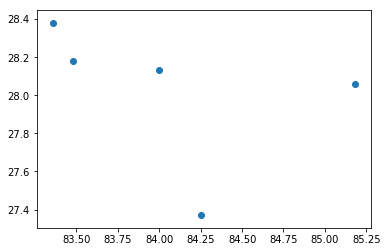

In [77]:
plt.scatter(loc.Longitude,loc.Latitude)

In [78]:
label = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x = np.arange(13)

In [79]:
dhunche1=pd.read_csv('precip/prec_Dhunche.csv',na_values=-99.9)
dhunche1['Time']=pd.to_datetime(dhunche1['Time'])

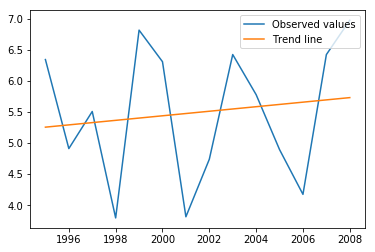

In [80]:
dhunche=dhunche1[1095:].groupby(dhunche1.Time.dt.year).mean()
time=dhunche.index
prec=dhunche['Precipitation (mm)']
z = np.polyfit(time,prec, 1)
p = np.poly1d(z)
plt.plot(time,prec,label='Observed values')
plt.plot(time,p(time),label='Trend line')
plt.legend()

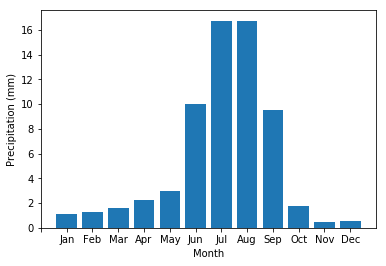

In [81]:
dhunche1=pd.read_csv('precip/prec_Dhunche.csv',na_values=-99.9)
dhunche1['Time']=pd.to_datetime(dhunche1['Time'])
dhunche_month=dhunche1[1095:].groupby(dhunche1.Time.dt.month).mean()
time=dhunche_month.index
m_prec=dhunche_month['Precipitation (mm)']
plt.bar(time,m_prec)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(x,label)
plt.show()

In [82]:
lete=pd.read_csv('precip/prec_Lete.csv',na_values=-99.9)
lete['Time']=pd.to_datetime(lete['Time'])
lete=lete.groupby(lete.Time.dt.year).mean()

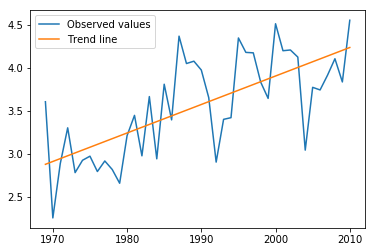

In [83]:
time=lete.index
prec=lete['Precipitation (mm)']
z = np.polyfit(time,prec, 1)
p = np.poly1d(z)
plt.plot(time,prec,label='Observed values')
plt.plot(time,p(time),label='Trend line')
plt.legend()

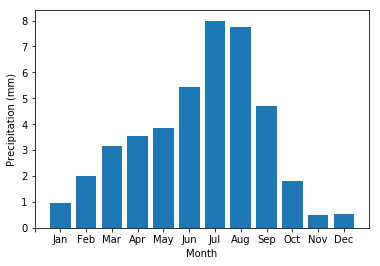

In [84]:
lete=pd.read_csv('precip/prec_Lete.csv',na_values=-99.9)
lete['Time']=pd.to_datetime(lete['Time'])
lete_month=lete.groupby(lete.Time.dt.month).mean()
time=lete_month.index
m_prec=lete_month['Precipitation (mm)']
plt.bar(time,m_prec)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(x,label)
plt.show()

In [85]:
lumle1=pd.read_csv('precip/prec_Lumle.csv',na_values='')
lumle1['Time']=pd.to_datetime(lumle1['Time'])
lumle=lumle1[365:].groupby(lumle1.Time.dt.year).mean() #measurements started in November 1969, so we remove all the data from that year

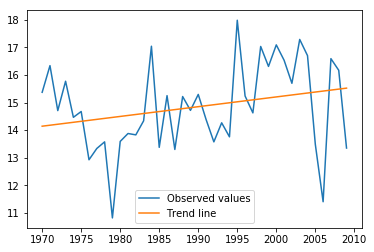

In [86]:
time=lumle.index
prec=lumle['Precipitation (mm)']
z = np.polyfit(time,prec, 1)
p = np.poly1d(z)
plt.plot(time,prec,label='Observed values')
plt.plot(time,p(time),label='Trend line')
plt.legend()

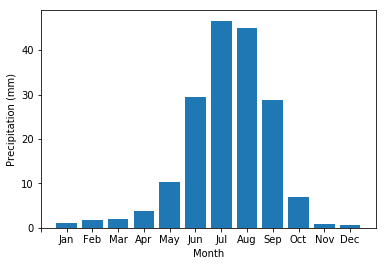

In [87]:
lumle1=pd.read_csv('precip/prec_Lumle.csv',na_values='')
lumle1['Time']=pd.to_datetime(lumle1['Time'])
lumle_month=lumle1[365:].groupby(lumle1.Time.dt.month).mean()
time=lumle_month.index
m_prec=lumle_month['Precipitation (mm)']
plt.bar(time,m_prec)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(x,label)
plt.show()

In [88]:
pohara1=pd.read_csv('precip/prec_Pohara.csv',na_values=-99.9)
pohara1['Time']=pd.to_datetime(pohara1['Time'])
pohara=pohara1[365:].groupby(pohara1.Time.dt.year).mean()

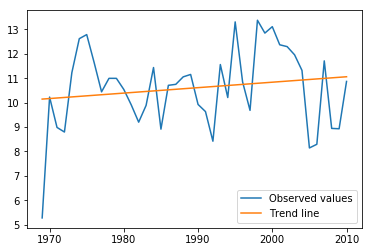

In [89]:
time=pohara.index
prec=pohara['Precipitation (mm)']
z = np.polyfit(time,prec, 1)
p = np.poly1d(z)
plt.plot(time,prec,label='Observed values')
plt.plot(time,p(time),label='Trend line')
plt.legend()

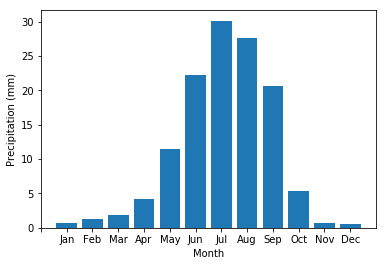

In [90]:
pohara1=pd.read_csv('precip/prec_Pohara.csv',na_values=-99.9)
pohara1['Time']=pd.to_datetime(pohara1['Time'])
pohara_month=pohara1[365:].groupby(pohara1.Time.dt.month).mean()
time=pohara_month.index
m_prec=pohara_month['Precipitation (mm)']
plt.bar(time,m_prec)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(x,label)
plt.show()

In [91]:
rampur=pd.read_csv('precip/prec_Rampur.csv',na_values=-99.9)
rampur['Time']=pd.to_datetime(rampur['Time'])
rampur=rampur.groupby(rampur.Time.dt.year).mean()

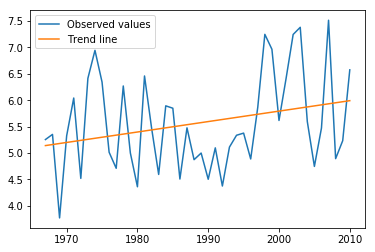

In [92]:
time=rampur.index
prec=rampur['Precipitation (mm)']
z = np.polyfit(time,prec, 1)
p = np.poly1d(z)
plt.plot(time,prec,label='Observed values')
plt.plot(time,p(time),label='Trend line')
plt.legend()

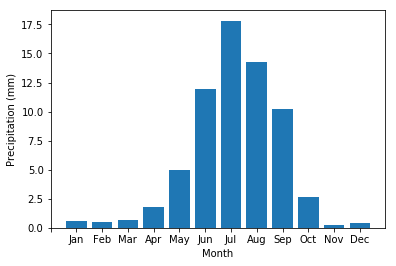

In [93]:
rampur=pd.read_csv('precip/prec_Rampur.csv',na_values=-99.9)
rampur['Time']=pd.to_datetime(rampur['Time'])
rampur_month=rampur.groupby(rampur.Time.dt.month).mean()
time=rampur_month.index
m_prec=rampur_month['Precipitation (mm)']
plt.bar(time,m_prec)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(x,label)
plt.show()